# Dataset

### Know Your Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display  # interactive display
from tqdm import tqdm   #progress bar of execution
from collections import Counter  # when u want to iterate over something and keep a count of that
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import os                                                                        # for listing files in given directory

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

import spacy
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag, word_tokenize, RegexpParser

from sklearn.feature_extraction.text import CountVectorizer     # to create a dict --> how many times which word has occured in the document
from textblob import TextBlob
import scipy.stats as stats

from wordcloud import WordCloud

from sklearn.decomposition import TruncatedSVD              # Singular value decomposition
from sklearn.decomposition import LatentDirichletAllocation  
from sklearn.manifold import TSNE    # similar to PCA --> used for dimensionality reduction

#output_notebook()

%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


#### Installing packages

In [ ]:
!pip install contractions                                                        # for removing contractions
!pip install pyLDAvis  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 12.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=b944b8061cf2c23471e268bba2bee0bc07b0ef15dd3b748cfd2efc4d7c3e2a33
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl siz

In [ ]:
path = '/content/drive/MyDrive/Almabetter/Capstone Projects/Unsupervised Learning/Topic Modelling/bbc/'
folders = ["business", "entertainment", "politics", "sport", "tech"]

In [ ]:
news = []                                                                        
topics = []

for i in folders:
  lst_file_names = os.listdir(path+i)                                            # list of file names present in directory bbc
  for txt_files in lst_file_names:
    txt_path = path + i+ '/'+ txt_files                                          # exact path of all text files
    with open(txt_path, 'rb') as f:                                              # open a binary file
      text = f.read()                                                            # read all lines
      news.append(text)                                                          # append text files 
      topics.append(i)                                                           # append topics 


In [ ]:
# creating a dataframe of news & type
df = pd.DataFrame()
df['News_text'] = news
df['type'] = topics

In [ ]:
df.head()

,News_text,type
0,b'Yukos unit buyer faces loan claim\n\nThe own...,business
1,b'Ad sales boost Time Warner profit\n\nQuarter...,business
2,b'Dollar gains on Greenspan speech\n\nThe doll...,business
3,b'US trade gap hits record in 2004\n\nThe gap ...,business
4,b'High fuel prices hit BA\'s profits\n\nBritis...,business


In [ ]:
df.tail()

,News_text,type
2220,b'BT program to beat dialler scams\n\nBT is in...,tech
2221,b'Bad e-mail habits sustains spam\n\nThe \'bad...,tech
2222,b'Microsoft plans \'safer ID\' system\n\nMicro...,tech
2223,b'Camera phones are \'must-haves\'\n\nFour tim...,tech
2224,b'Beckham virus spotted on the net\n\nVirus wr...,tech


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   News_text  2225 non-null   object
 1   type       2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [ ]:
df.shape

(2225, 2)

In [ ]:
df.duplicated().sum()

98

In [ ]:
df.isnull().sum()

News_text    0
type         0
dtype: int64

### Data Wrangling

In [ ]:
# finding length of each news
df['length'] = df['News_text'].apply(len)

In [ ]:
# finding word countof each news
df['word_count'] = df['News_text'].apply(lambda x:len(str(x).split(" ")))

In [ ]:
df.head()

,News_text,type,length,word_count
0,b'Yukos unit buyer faces loan claim\n\nThe own...,business,1552,261
1,b'Ad sales boost Time Warner profit\n\nQuarter...,business,2560,416
2,b'Dollar gains on Greenspan speech\n\nThe doll...,business,2252,381
3,b'US trade gap hits record in 2004\n\nThe gap ...,business,1954,324
4,b'High fuel prices hit BA\'s profits\n\nBritis...,business,2412,401


### EDA

In [ ]:
bbc_df = df.copy()

In [ ]:
topic_count = bbc_df['type'].value_counts()
topic_count

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: type, dtype: int64

[]

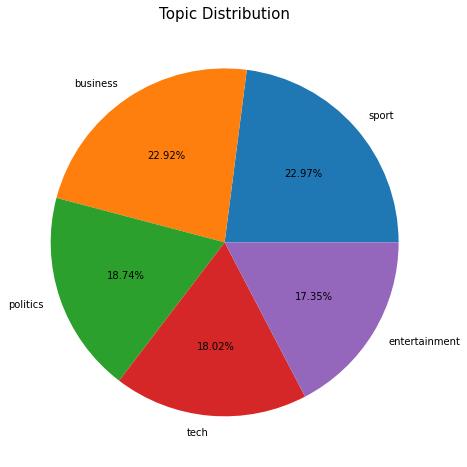

In [ ]:
plt.figure(figsize = (10, 8))
plt.pie(topic_count , labels = topic_count.index, autopct = '%0.2f%%' )
plt.title("Topic Distribution", size=15)
plt.plot()

[]

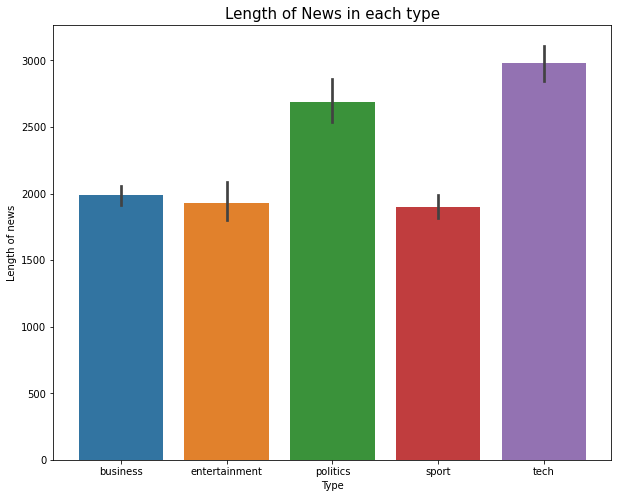

In [ ]:
# length of news in each type
plt.figure(figsize = (10, 8))
sns.barplot(x= bbc_df['type'], y= bbc_df['length'])
plt.title('Length of News in each type', size=15)
plt.xlabel('Type')
plt.ylabel("Length of news")
plt.plot()

[]

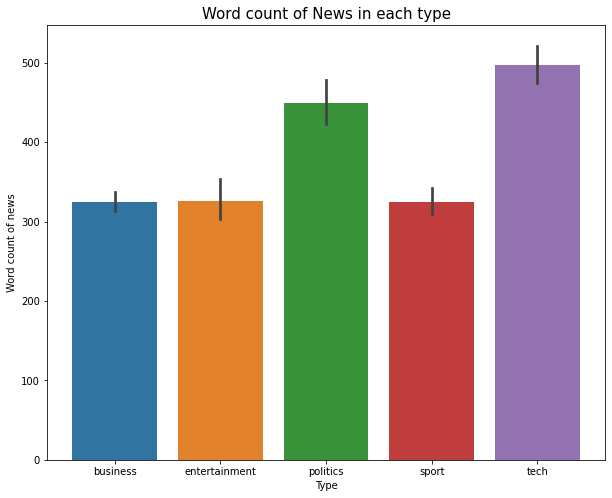

In [ ]:
# length of news in each type
plt.figure(figsize = (10, 8))
sns.barplot(x= bbc_df['type'], y= bbc_df['word_count'])
plt.title('Word count of News in each type', size=15)
plt.xlabel('Type')
plt.ylabel("Word count of news")
plt.plot()

### Handling Missing & Duplicate values

In [ ]:
# dropping duplicate values
bbc_df.drop_duplicates(inplace=True)

### Text Pre-processing

In [ ]:
bbc_df.head()

,News_text,type,length,word_count
0,b'Yukos unit buyer faces loan claim\n\nThe own...,business,1552,261
1,b'Ad sales boost Time Warner profit\n\nQuarter...,business,2560,416
2,b'Dollar gains on Greenspan speech\n\nThe doll...,business,2252,381
3,b'US trade gap hits record in 2004\n\nThe gap ...,business,1954,324
4,b'High fuel prices hit BA\'s profits\n\nBritis...,business,2412,401


In [ ]:
bbc_df['News_text'][2]

b'Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government\'s willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan\'s speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. "I think the chairman\'s taking a much more sanguine view on the current account deficit than he\'s taken for some time," said Robert Sinche, head of currency strategy at Bank of America in New York. "He\'s taking a longer-term view, laying out a set of conditions 

In [ ]:
# Expand Contraction

* Lower casing

In [ ]:
# Lower Casing
bbc_df['News_text']= bbc_df['News_text'].apply(lambda x: x.lower())

In [ ]:
# Converting column into astring
bbc_df['News_text'] = bbc_df['News_text'].astype('str') 

In [ ]:
# removing HTML tags
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re                                                                    # regular expression module
    clean = re.compile('<.*?>')                                                  # removes anything in < >
    return re.sub(clean, '', text)

In [ ]:
bbc_df['News_text'] = bbc_df['News_text'].apply(remove_html_tags)

In [ ]:
# removing url's
def remove_urls(text):
  """ Remove url tags from a string """
  url_pattern = r"https?://+|www\."                       # \S+ --> matches anything non-white space character with repetations ; ? --> matches 0 or 1 occurences of pattern to  its left 
  without_urls = re.sub(pattern=url_pattern, repl=' ', string=text)
  return without_urls

In [ ]:
bbc_df['News_text'] = bbc_df['News_text'].apply(remove_urls)

In [ ]:
bbc_df['News_text'][2]

'b\'dollar gains on greenspan speech\\n\\nthe dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise.\\n\\nand alan greenspan highlighted the us government\\\'s willingness to curb spending and rising household savings as factors which may help to reduce it. in late trading in new york, the dollar reached $1.2871 against the euro, from $1.2974 on thursday. market concerns about the deficit has hit the greenback in recent months. on friday, federal reserve chairman mr greenspan\\\'s speech in london ahead of the meeting of g7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected us jobs data. "i think the chairman\\\'s taking a much more sanguine view on the current account deficit than he\\\'s taken for some time," said robert sinche, head of currency strategy at bank of america in new york. "he\\\'s taking a longer-term view, laying out a se

In [ ]:
# removing non-word 
def rem_non_word(text):
  """ Remove non-word characters from the string """
  non_words = r"\s+[a-zA-Z]'\s+"                                               # \s+ --> matches space character with repetation(+) ; [a-zA-Z] --> match text string within range
  without_nw = re.sub(pattern = non_words , repl = '', string =text)
  return without_nw

In [ ]:
bbc_df['News_text'] = bbc_df['News_text'].apply(rem_non_word)

In [ ]:
bbc_df['News_text'] = [re.sub(r"\\n+", " ", i) for i in bbc_df['News_text']]

In [ ]:
bbc_df['News_text'][2]

'b\'dollar gains on greenspan speech  the dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise.  and alan greenspan highlighted the us government\\\'s willingness to curb spending and rising household savings as factors which may help to reduce it. in late trading in new york, the dollar reached $1.2871 against the euro, from $1.2974 on thursday. market concerns about the deficit has hit the greenback in recent months. on friday, federal reserve chairman mr greenspan\\\'s speech in london ahead of the meeting of g7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected us jobs data. "i think the chairman\\\'s taking a much more sanguine view on the current account deficit than he\\\'s taken for some time," said robert sinche, head of currency strategy at bank of america in new york. "he\\\'s taking a longer-term view, laying out a set of con

In [ ]:
bbc_df['News_text'] = [re.sub(r"b\'+", "", i) for i in bbc_df['News_text']]

In [ ]:
bbc_df['News_text'][2]

'dollar gains on greenspan speech  the dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise.  and alan greenspan highlighted the us government\\\'s willingness to curb spending and rising household savings as factors which may help to reduce it. in late trading in new york, the dollar reached $1.2871 against the euro, from $1.2974 on thursday. market concerns about the deficit has hit the greenback in recent months. on friday, federal reserve chairman mr greenspan\\\'s speech in london ahead of the meeting of g7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected us jobs data. "i think the chairman\\\'s taking a much more sanguine view on the current account deficit than he\\\'s taken for some time," said robert sinche, head of currency strategy at bank of america in new york. "he\\\'s taking a longer-term view, laying out a set of condit

In [ ]:
bbc_df['News_text'] = [re.sub(r"\\\'s+", "", i) for i in bbc_df['News_text']]

In [ ]:
bbc_df['News_text'][2]

'dollar gains on greenspan speech  the dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise.  and alan greenspan highlighted the us government willingness to curb spending and rising household savings as factors which may help to reduce it. in late trading in new york, the dollar reached $1.2871 against the euro, from $1.2974 on thursday. market concerns about the deficit has hit the greenback in recent months. on friday, federal reserve chairman mr greenspan speech in london ahead of the meeting of g7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected us jobs data. "i think the chairman taking a much more sanguine view on the current account deficit than he taken for some time," said robert sinche, head of currency strategy at bank of america in new york. "he taking a longer-term view, laying out a set of conditions under which the curr

* Removing punctuations

In [ ]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
  """ Removes punctuations mentioned in the library """
  punctuation_free = "".join([i for i in text if i not in string.punctuation])    # joins everything except punctuations
  return punctuation_free

In [ ]:
bbc_df['News_text'] = bbc_df['News_text'].apply(lambda x:remove_punctuation(x))

In [ ]:
bbc_df['News_text'][2]

'dollar gains on greenspan speech  the dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise  and alan greenspan highlighted the us government willingness to curb spending and rising household savings as factors which may help to reduce it in late trading in new york the dollar reached 12871 against the euro from 12974 on thursday market concerns about the deficit has hit the greenback in recent months on friday federal reserve chairman mr greenspan speech in london ahead of the meeting of g7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worsethanexpected us jobs data i think the chairman taking a much more sanguine view on the current account deficit than he taken for some time said robert sinche head of currency strategy at bank of america in new york he taking a longerterm view laying out a set of conditions under which the current account deficit ca

* Remove Numbers

In [ ]:
def remove_numbers(text):
  num_to_remove = r'\d+'                                                               # \d+ --> matches digits 0-9 with any repetation
  without_num = re.sub(pattern = num_to_remove , repl ="", string=text)
  return without_num

In [ ]:
bbc_df['News_text'] = bbc_df['News_text'].apply(remove_numbers)

In [ ]:
bbc_df['News_text'][2]

'dollar gains on greenspan speech  the dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise  and alan greenspan highlighted the us government willingness to curb spending and rising household savings as factors which may help to reduce it in late trading in new york the dollar reached  against the euro from  on thursday market concerns about the deficit has hit the greenback in recent months on friday federal reserve chairman mr greenspan speech in london ahead of the meeting of g finance ministers sent the dollar higher after it had earlier tumbled on the back of worsethanexpected us jobs data i think the chairman taking a much more sanguine view on the current account deficit than he taken for some time said robert sinche head of currency strategy at bank of america in new york he taking a longerterm view laying out a set of conditions under which the current account deficit can improve t

* Tokenization

In [ ]:
#Word tokenization function
def tokenization(text):
    tokens = re.split('\W+',text)                           # creates words as tokens
    return tokens

In [ ]:
bbc_df['tokens'] = bbc_df['News_text'].apply(tokenization)

In [ ]:
bbc_df.head()

,News_text,type,length,word_count,tokens
0,yukos unit buyer faces loan claim the owners ...,business,1552,261,"[yukos, unit, buyer, faces, loan, claim, the, ..."
1,ad sales boost time warner profit quarterly p...,business,2560,416,"[ad, sales, boost, time, warner, profit, quart..."
2,dollar gains on greenspan speech the dollar h...,business,2252,381,"[dollar, gains, on, greenspan, speech, the, do..."
3,us trade gap hits record in the gap between ...,business,1954,324,"[us, trade, gap, hits, record, in, the, gap, b..."
4,high fuel prices hit ba profits british airwa...,business,2412,401,"[high, fuel, prices, hit, ba, profits, british..."


* Removing Stop-words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
bbc_df['News_wo_stopwords'] = bbc_df['News_text'].apply(stopwords)

In [ ]:
bbc_df.head()

,News_text,type,length,word_count,tokens,News_wo_stopwords
0,yukos unit buyer faces loan claim the owners ...,business,1552,261,"[yukos, unit, buyer, faces, loan, claim, the, ...",yukos unit buyer faces loan claim owners embat...
1,ad sales boost time warner profit quarterly p...,business,2560,416,"[ad, sales, boost, time, warner, profit, quart...",ad sales boost time warner profit quarterly pr...
2,dollar gains on greenspan speech the dollar h...,business,2252,381,"[dollar, gains, on, greenspan, speech, the, do...",dollar gains greenspan speech dollar hit highe...
3,us trade gap hits record in the gap between ...,business,1954,324,"[us, trade, gap, hits, record, in, the, gap, b...",us trade gap hits record gap us exports import...
4,high fuel prices hit ba profits british airwa...,business,2412,401,"[high, fuel, prices, hit, ba, profits, british...",high fuel prices hit ba profits british airway...


* Lemmatization

In [ ]:
#defining the object for Lemmatization
lmt = WordNetLemmatizer()

In [ ]:
#defining the function for lemmatization
def lemmatizer(text):
  """ This function lematizes each word in the text """
  lemat_text = [lmt.lemmatize(word) for word in text.split()]
  return lemat_text

In [ ]:
bbc_df['lematized_news'] = bbc_df['News_text'].apply(lambda x:lemmatizer(x))

In [ ]:
bbc_df.head()

,News_text,type,length,word_count,tokens,News_wo_stopwords,lematized_news
0,yukos unit buyer faces loan claim the owners ...,business,1552,261,"[yukos, unit, buyer, faces, loan, claim, the, ...",yukos unit buyer faces loan claim owners embat...,"[yukos, unit, buyer, face, loan, claim, the, o..."
1,ad sales boost time warner profit quarterly p...,business,2560,416,"[ad, sales, boost, time, warner, profit, quart...",ad sales boost time warner profit quarterly pr...,"[ad, sale, boost, time, warner, profit, quarte..."
2,dollar gains on greenspan speech the dollar h...,business,2252,381,"[dollar, gains, on, greenspan, speech, the, do...",dollar gains greenspan speech dollar hit highe...,"[dollar, gain, on, greenspan, speech, the, dol..."
3,us trade gap hits record in the gap between ...,business,1954,324,"[us, trade, gap, hits, record, in, the, gap, b...",us trade gap hits record gap us exports import...,"[u, trade, gap, hit, record, in, the, gap, bet..."
4,high fuel prices hit ba profits british airwa...,business,2412,401,"[high, fuel, prices, hit, ba, profits, british...",high fuel prices hit ba profits british airway...,"[high, fuel, price, hit, ba, profit, british, ..."


* Clean News

In [ ]:
bbc_df['clean_news'] = [' '.join(text) for text in bbc_df['lematized_news']] 

In [ ]:
bbc_df['clean_news'][2]

'dollar gain on greenspan speech the dollar ha hit it highest level against the euro in almost three month after the federal reserve head said the u trade deficit is set to stabilise and alan greenspan highlighted the u government willingness to curb spending and rising household saving a factor which may help to reduce it in late trading in new york the dollar reached against the euro from on thursday market concern about the deficit ha hit the greenback in recent month on friday federal reserve chairman mr greenspan speech in london ahead of the meeting of g finance minister sent the dollar higher after it had earlier tumbled on the back of worsethanexpected u job data i think the chairman taking a much more sanguine view on the current account deficit than he taken for some time said robert sinche head of currency strategy at bank of america in new york he taking a longerterm view laying out a set of condition under which the current account deficit can improve this year and next wo

* POS Tagging

In [ ]:
# using spacy library

def pos_tagging(text):
  allowed_postags = ['NOUN', 'ADJ']
  tag_txt = []
  doc = nlp(text)
  tag_txt.append([token.text for token in doc if token.pos_ in allowed_postags])   
  return ' '.join(tag_txt[0])


In [ ]:
nlp = spacy.load("en_core_web_sm" ,disable=['parser', 'ner'])
bbc_df['news'] = bbc_df['clean_news'].apply(lambda x:pos_tagging(x))

In [ ]:
bbc_df.head()

,News_text,type,length,word_count,tokens,News_wo_stopwords,lematized_news,clean_news,news
0,yukos unit buyer faces loan claim the owners ...,business,1552,261,"[yukos, unit, buyer, faces, loan, claim, the, ...",yukos unit buyer faces loan claim owners embat...,"[yukos, unit, buyer, face, loan, claim, the, o...",yukos unit buyer face loan claim the owner of ...,unit buyer face loan claim owner russian oil g...
1,ad sales boost time warner profit quarterly p...,business,2560,416,"[ad, sales, boost, time, warner, profit, quart...",ad sales boost time warner profit quarterly pr...,"[ad, sale, boost, time, warner, profit, quarte...",ad sale boost time warner profit quarterly pro...,ad sale boost time profit quarterly profit u m...
2,dollar gains on greenspan speech the dollar h...,business,2252,381,"[dollar, gains, on, greenspan, speech, the, do...",dollar gains greenspan speech dollar hit highe...,"[dollar, gain, on, greenspan, speech, the, dol...",dollar gain on greenspan speech the dollar ha ...,dollar gain greenspan speech dollar highest le...
3,us trade gap hits record in the gap between ...,business,1954,324,"[us, trade, gap, hits, record, in, the, gap, b...",us trade gap hits record gap us exports import...,"[u, trade, gap, hit, record, in, the, gap, bet...",u trade gap hit record in the gap between u ex...,u trade gap record gap export import alltime h...
4,high fuel prices hit ba profits british airwa...,business,2412,401,"[high, fuel, prices, hit, ba, profits, british...",high fuel prices hit ba profits british airway...,"[high, fuel, price, hit, ba, profit, british, ...",high fuel price hit ba profit british airway h...,high fuel price profit british airway high fue...


In [ ]:
bbc_df['news'][0]

'unit buyer face loan claim owner russian oil giant buyer former production unit stateowned yugansk unit sale part bn tax claim rosneft loan asset rosneft similar repayment demand foreign bank legal expert rosneft purchase such obligation asset rosneft real money creditor seizure yugansk asset lawyer case menatep group director rule law international arbitration clause credit rosneft official unavailable comment company action menatep tax claim debt bankruptcy protection court attempt sale main production arm sale littleknown shell company turn rosneft claim wa punishment political ambition founder participant sale'

### Top Words

In [ ]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)        # .values --> creates a numpy array
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)           # index / position of each word in all documents
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)                # values of words at that position
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))         # n top words binary matrix for all the headlines
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for                           # n top words 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=bbc_df['news'])

In [ ]:
words

['year',
 'people',
 'new',
 'game',
 'time',
 'government',
 'company',
 'world',
 'film',
 'firm',
 'best',
 'number',
 'country',
 'month',
 'way']

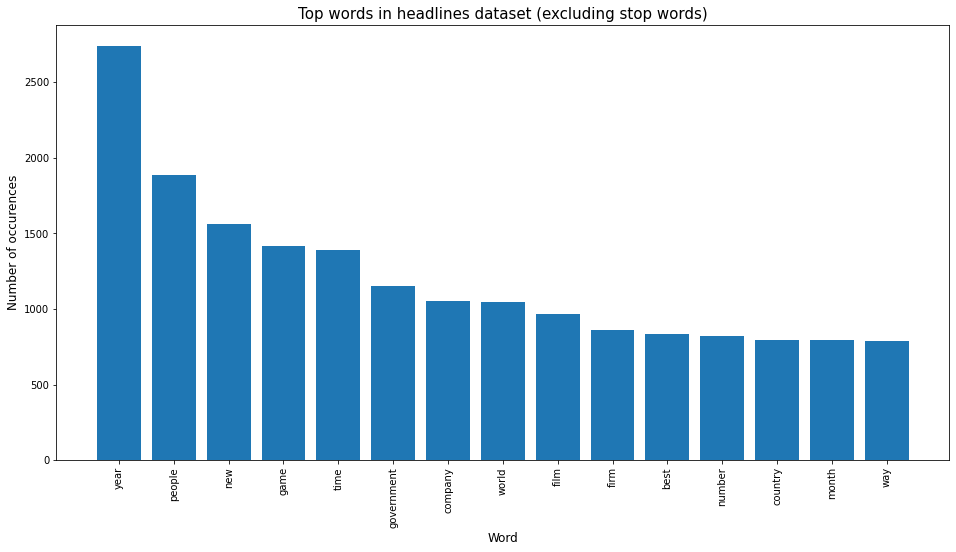

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=bbc_df['news'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)', size = 15)
ax.set_xlabel('Word', size =12 )
ax.set_ylabel('Number of occurences', size=12)
plt.show()

### Word-Cloud

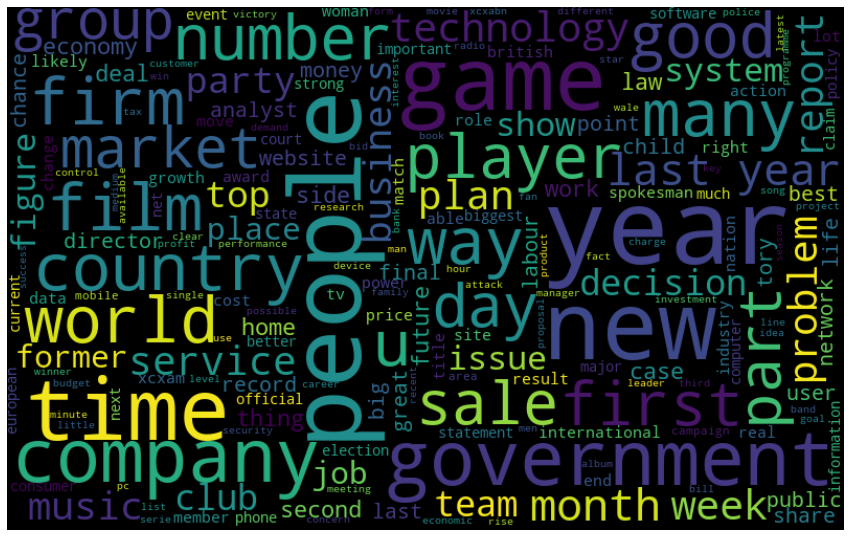

In [ ]:
plt.figure(figsize=(15,10))
cl_words = ' '.join(bbc_df['news'])
wordCloud = WordCloud(width=800, height=500, background_color="black", max_font_size=100).generate(cl_words)
plt.imshow(wordCloud, interpolation="bilinear", cmap = 'BuPu')
plt.axis('off')
plt.show()

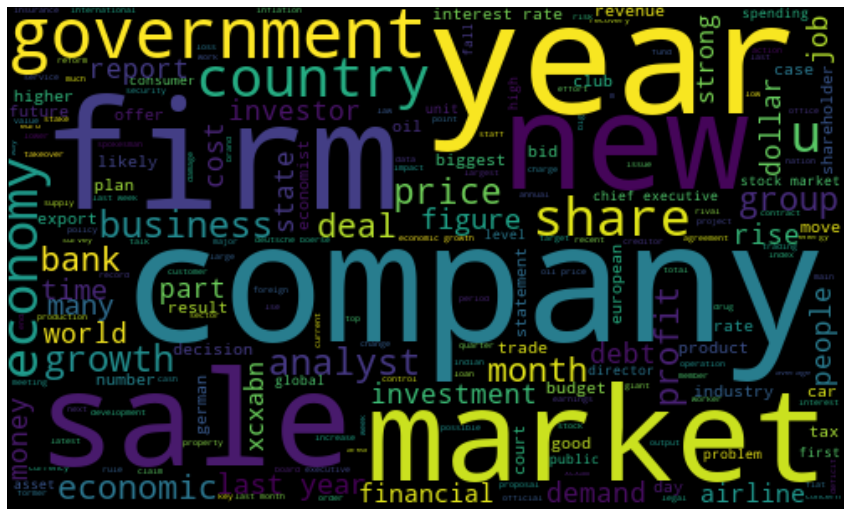

In [ ]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in bbc_df[bbc_df['type']=='business']['news']])
wordCloud = WordCloud(width=500, height=300, background_color="black", random_state=21, max_font_size=100).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear", cmap = 'Greys')
plt.axis('off')
plt.show()

### Text-Vectorization

* Count Vectorization

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english', max_features=4000)                         ## Common for all models
count_data = count_vectorizer.fit_transform(bbc_df['news'])
feature_names = count_vectorizer.get_feature_names()
number_topics = 5
top_words = 15

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print('Headline after vectorization : \n{}'.format(feature_names))

Headline after vectorization : 
['aaa', 'ability', 'able', 'abn', 'abortion', 'absa', 'absence', 'absent', 'absolute', 'abuse', 'academic', 'academy', 'acceptable', 'acceptance', 'access', 'accessible', 'accident', 'acclaim', 'accolade', 'account', 'accountability', 'accountable', 'accounting', 'accuracy', 'accurate', 'accusation', 'ace', 'achievement', 'acquisition', 'act', 'acting', 'action', 'active', 'activist', 'activity', 'actor', 'actress', 'actual', 'ad', 'adal', 'adaptation', 'adapter', 'adaptor', 'addiction', 'addition', 'additional', 'addons', 'address', 'adjustment', 'administration', 'administrator', 'admission', 'adoption', 'adult', 'advance', 'advanced', 'advantage', 'adventure', 'advert', 'advertiser', 'advertising', 'advice', 'adviser', 'advisor', 'advisory', 'advocate', 'aerospace', 'affair', 'affected', 'affordable', 'afraid', 'african', 'aftermath', 'afternoon', 'age', 'aged', 'agency', 'agenda', 'agent', 'aggressive', 'agreement', 'agricultural', 'agriculture', 'ai

## ML Model Implementation

 ### 1. Latent Dirichlet Allocation (LDA)  



In [ ]:
# Parameter tuning 
from sklearn.model_selection import GridSearchCV 
grid_params = {'n_components':range(5, 10)}

In [ ]:
# LDA model
lda = LatentDirichletAllocation()
lda_model = GridSearchCV(lda, param_grid = grid_params)
lda_model.fit(count_data)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'n_components': range(5, 10)})

In [ ]:
# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(count_data))

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -364670.0717606832
LDA model Perplexity on train data 1163.1781386664659


In [ ]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

In [ ]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, count_data ,count_vectorizer,mds='tsne')
lda_panel

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has 

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  25.682568
1       51.163364 -159.968018       2        1  21.856404
3      -73.144554   21.523815       3        1  20.506578
0      -66.410133 -110.606438       4        1  16.825854
2       54.417324   12.443444       5        1  15.128596, topic_info=            Term         Freq        Total Category  logprob  loglift
1438        game  1391.000000  1391.000000  Default  30.0000  30.0000
1295        film   941.000000   941.000000  Default  29.0000  29.0000
1501  government  1134.000000  1134.000000  Default  28.0000  28.0000
300         best   815.000000   815.000000  Default  27.0000  27.0000
2596      player   728.000000   728.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
3981        year   279.271960  2690.467459   Topic5  -4.7413  -0.3767
3953       world   187.063300  1027.540588   Topic5  -5.1420   0.1851
3879         way   171.410967   771.417854   Topic5  -5.2294   0.3844
3570       thing   146.798293   408.835925   Topic5  -5.3844   0.8643
2330         new   154.862584  1538.449348   Topic5  -5.3309  -0.4074

[359 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
22        3  0.986157  accounting
35        4  0.995425       actor
36        4  0.989969     actress
87        3  0.983888    aircraft
88        2  0.013152     airline
...     ...       ...         ...
3981      2  0.129717        year
3981      3  0.349010        year
3981      4  0.281364        year
3981      5  0.103699        year
3995      3  0.984686     yugansk

[708 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 1, 3])

*LDA correctly describes the topics that we most, predicted*

### 2. Latent Semantic Analysis (LSA)

* using Count vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, tqdm_notebook

In [ ]:
# document clustering for LSA
tsvd = TruncatedSVD(n_components = 5)
tsvd.fit(count_data)
tsvd_mat = tsvd.transform(count_data)

In [ ]:
s_list =[]

for clus in tqdm(range(2, 21)):
  km = KMeans(n_clusters=clus, n_init=50, max_iter=1000)                         # Instantiate KMeans clustering
  km.fit(tsvd_mat)                                                               # Run KMeans clustering
  s = silhouette_score(tsvd_mat, km.labels_)
  s_list.append(s)

100%|██████████| 19/19 [01:05<00:00,  3.47s/it]


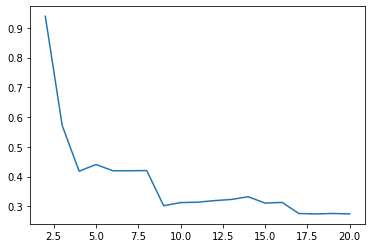

In [ ]:
plt.plot(range(2,21), s_list)
plt.show()

In [ ]:
# TSNE plot
tsne = TSNE(n_components=2)
tsne_mat = tsne.fit_transform(tsvd_mat)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


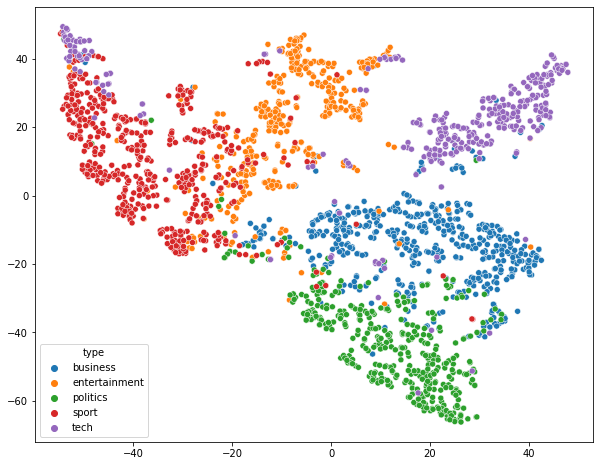

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(tsne_mat[:,0],tsne_mat[:,1],hue=bbc_df['type'])

In [ ]:
def create_top_words_dict(model, features , n_top_words):                        # Defining function for top words
    """ This function gives top words."""
    top_words_dict = {}
    for topic_id, topic in enumerate(model.components_):
        top_words_dict[topic_id] = [features[i] for i in topic.argsort()[:-n_top_words - 1:-1]]        
    return top_words_dict

In [ ]:
print("Top 20 words bagged by SVD model using CountVectorizer")

svd_top_words = create_top_words_dict(tsvd, feature_names , top_words)

print(svd_top_words)

Top 20 words bagged by SVD model using CountVectorizer
{0: ['year', 'people', 'game', 'new', 'music', 'time', 'government', 'best', 'song', 'world', 'way', 'company', 'good', 'service', 'mobile'], 1: ['best', 'song', 'music', 'award', 'year', 'angel', 'film', 'urban', 'british', 'artist', 'album', 'band', 'prize', 'pop', 'brit'], 2: ['game', 'mobile', 'player', 'phone', 'time', 'technology', 'video', 'world', 'gaming', 'title', 'online', 'team', 'console', 'pc', 'tv'], 3: ['music', 'mobile', 'phone', 'people', 'technology', 'service', 'urban', 'network', 'user', 'digital', 'firm', 'net', 'camera', 'device', 'gadget'], 4: ['music', 'party', 'game', 'urban', 'labour', 'election', 'people', 'black', 'tory', 'government', 'campaign', 'term', 'issue', 'minister', 'leader']}


In [ ]:
pd.set_option('display.max_colwidth', None)    

In [ ]:
svd_top_words = create_top_words_dict(tsvd, feature_names , top_words)
svd_df = pd.DataFrame([svd_top_words]).T
svd_df.rename(columns = {0: 'Top 20 words'}, inplace = True)
svd_df.rename(index = {0: 'Topic 1', 1: 'Topic 2' , 2: 'Topic 3' , 3: 'Topic 4' , 4 : 'Topic 5'}, inplace = True)
svd_df

,Top 20 words
Topic 1,"[year, people, game, new, music, time, government, best, song, world, way, company, good, service, mobile]"
Topic 2,"[best, song, music, award, year, angel, film, urban, british, artist, album, band, prize, pop, brit]"
Topic 3,"[game, mobile, player, phone, time, technology, video, world, gaming, title, online, team, console, pc, tv]"
Topic 4,"[music, mobile, phone, people, technology, service, urban, network, user, digital, firm, net, camera, device, gadget]"
Topic 5,"[music, party, game, urban, labour, election, people, black, tory, government, campaign, term, issue, minister, leader]"


* Using TF-IDF 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.8, max_features=8000,min_df=0.05)
tfidf_matrix = vectorizer.fit_transform(bbc_df['news'])

In [ ]:
tfidf_matrix.shape

(2127, 329)

In [ ]:
# svd model

svd_model = TruncatedSVD(n_components = 5, algorithm ='randomized', n_iter =100, random_state = 0)
svd_model.fit(tfidf_matrix)

TruncatedSVD(n_components=5, n_iter=100, random_state=0)

In [ ]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:15]
    print("Topic \n" +str(i)+" " )
    for t in sorted_terms:
        print(t[0],end=" ")


Topic 
0 
year game people new film last time company government world more first firm player sale Topic 
1 
government labour election party tax tory company firm economy plan minister people economic growth market Topic 
2 
film award best director movie role show tv music year star story production british dollar Topic 
3 
labour election party tory film tax minister conservative government leader campaign best liberal award plan Topic 
4 
phone people mobile technology user computer music service software network net digital tv pc system 

### 3. LDA using Gensim library

In [ ]:
import gensim
from gensim import corpora

/usr/local/lib/python3.8/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [ ]:
# creating word vector for gensim 
dtm_g = bbc_df['news'].str.split().tolist()

In [ ]:
dtm_g[:1]

[['unit',
  'buyer',
  'face',
  'loan',
  'claim',
  'owner',
  'russian',
  'oil',
  'giant',
  'buyer',
  'former',
  'production',
  'unit',
  'stateowned',
  'yugansk',
  'unit',
  'sale',
  'part',
  'bn',
  'tax',
  'claim',
  'rosneft',
  'loan',
  'asset',
  'rosneft',
  'similar',
  'repayment',
  'demand',
  'foreign',
  'bank',
  'legal',
  'expert',
  'rosneft',
  'purchase',
  'such',
  'obligation',
  'asset',
  'rosneft',
  'real',
  'money',
  'creditor',
  'seizure',
  'yugansk',
  'asset',
  'lawyer',
  'case',
  'menatep',
  'group',
  'director',
  'rule',
  'law',
  'international',
  'arbitration',
  'clause',
  'credit',
  'rosneft',
  'official',
  'unavailable',
  'comment',
  'company',
  'action',
  'menatep',
  'tax',
  'claim',
  'debt',
  'bankruptcy',
  'protection',
  'court',
  'attempt',
  'sale',
  'main',
  'production',
  'arm',
  'sale',
  'littleknown',
  'shell',
  'company',
  'turn',
  'rosneft',
  'claim',
  'wa',
  'punishment',
  'political

In [ ]:
id2word = corpora.Dictionary(dtm_g)                                                # mapping words to tokens
# counting the number of occurrences of each distinct word,--> converting to its integer word id and return the result as a sparse vector.
corpus = [id2word.doc2bow(text) for text in dtm_g]                                

In [ ]:
print(corpus[:120])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 4), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 6), (51, 1), (52, 1), (53, 4), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 3), (63, 1), (64, 2)], [(14, 2), (26, 1), (31, 1), (41, 1), (47, 1), (53, 5), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 1), (71, 4), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 2), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 2), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 3), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (1

In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('action', 1),
  ('ambition', 1),
  ('arbitration', 1),
  ('arm', 1),
  ('asset', 3),
  ('attempt', 1),
  ('bank', 1),
  ('bankruptcy', 1),
  ('bn', 1),
  ('buyer', 2),
  ('case', 1),
  ('claim', 4),
  ('clause', 1),
  ('comment', 1),
  ('company', 2),
  ('court', 1),
  ('credit', 1),
  ('creditor', 1),
  ('debt', 1),
  ('demand', 1),
  ('director', 1),
  ('expert', 1),
  ('face', 1),
  ('foreign', 1),
  ('former', 1),
  ('founder', 1),
  ('giant', 1),
  ('group', 1),
  ('international', 1),
  ('law', 1),
  ('lawyer', 1),
  ('legal', 1),
  ('littleknown', 1),
  ('loan', 2),
  ('main', 1),
  ('menatep', 2),
  ('money', 1),
  ('obligation', 1),
  ('official', 1),
  ('oil', 1),
  ('owner', 1),
  ('part', 1),
  ('participant', 1),
  ('political', 1),
  ('production', 2),
  ('protection', 1),
  ('punishment', 1),
  ('purchase', 1),
  ('real', 1),
  ('repayment', 1),
  ('rosneft', 6),
  ('rule', 1),
  ('russian', 1),
  ('sale', 4),
  ('seizure', 1),
  ('shell', 1),
  ('similar', 1),
  ('st

In [ ]:
lda_g = gensim.models.ldamodel.LdaModel                                           # creating object for lda using gensim library
lda_model = lda_g(corpus = corpus, num_topics = 5, id2word=id2word, random_state= 101, chunksize = 500 , passes=10 , eval_every =None )

In [ ]:
lda_model.print_topics()

[(0,
  '0.013*"government" + 0.010*"people" + 0.008*"party" + 0.008*"election" + 0.008*"labour" + 0.007*"new" + 0.007*"law" + 0.006*"country" + 0.006*"year" + 0.005*"plan"'),
 (1,
  '0.015*"people" + 0.012*"technology" + 0.011*"mobile" + 0.010*"phone" + 0.010*"more" + 0.009*"service" + 0.008*"user" + 0.008*"new" + 0.007*"computer" + 0.007*"network"'),
 (2,
  '0.034*"game" + 0.013*"player" + 0.010*"time" + 0.010*"world" + 0.009*"first" + 0.009*"year" + 0.008*"team" + 0.007*"last" + 0.007*"match" + 0.006*"club"'),
 (3,
  '0.016*"year" + 0.011*"company" + 0.010*"sale" + 0.010*"market" + 0.008*"firm" + 0.008*"price" + 0.007*"growth" + 0.006*"share" + 0.006*"deal" + 0.006*"business"'),
 (4,
  '0.015*"film" + 0.014*"year" + 0.010*"best" + 0.008*"music" + 0.008*"award" + 0.008*"show" + 0.006*"new" + 0.006*"people" + 0.005*"top" + 0.005*"song"')]

*The above output means: each of the unique words are given weights based on the topics.This implies which of the words dominate the topics.*

In [ ]:
print(lda_model.print_topics(num_topics=6, num_words=5))

[(0, '0.013*"government" + 0.010*"people" + 0.008*"party" + 0.008*"election" + 0.008*"labour"'), (1, '0.015*"people" + 0.012*"technology" + 0.011*"mobile" + 0.010*"phone" + 0.010*"more"'), (2, '0.034*"game" + 0.013*"player" + 0.010*"time" + 0.010*"world" + 0.009*"first"'), (3, '0.016*"year" + 0.011*"company" + 0.010*"sale" + 0.010*"market" + 0.008*"firm"'), (4, '0.015*"film" + 0.014*"year" + 0.010*"best" + 0.008*"music" + 0.008*"award"')]


In [ ]:
import pyLDAvis.gensim_models

In [ ]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda_model,corpus,id2word)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.054836  0.011004       1        1  30.892405
1     -0.152379  0.125831       2        1  19.359474
2      0.211587 -0.060052       3        1  17.047031
4      0.099012  0.121273       4        1  16.921665
3     -0.103384 -0.198056       5        1  15.779424, topic_info=            Term         Freq        Total Category  logprob  loglift
1519        game  1829.000000  1829.000000  Default  30.0000  30.0000
182   government  1040.000000  1040.000000  Default  29.0000  29.0000
92          film   730.000000   730.000000  Default  28.0000  28.0000
369   technology   595.000000   595.000000  Default  27.0000  27.0000
357       mobile   563.000000   563.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
325         rise   129.102450   189.402606   Topic5  -5.7361   1.4632
257         last   214.048229  1085.983281   Topic5  -5.2305   0.2224
262         more   207.473316  1313.188294   Topic5  -5.2617   0.0013
269       record   155.958022   432.613848   Topic5  -5.5471   0.8262
263          new   184.880256  1456.007509   Topic5  -5.3770  -0.2173

[358 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4936      4  0.996744    actor
5937      4  0.989418  actress
284       1  0.026192  airline
284       5  0.977826  airline
3562      4  0.990705    album
...     ...       ...      ...
225       2  0.125047     year
225       3  0.158504     year
225       4  0.253021     year
225       5  0.270168     year
822       5  0.983460      yen

[660 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 5, 4])

In [ ]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=dtm_g, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5240684935291128


### **Conclusion**



* Overall 3 different algorithms were used for evaluation of topic modelling.
* LDA provided considerable result , with distinct topics as expected.
* LSA with CountVectorizer gave somoewhat considerable results, but with TF-IDF the results were not as expected.
* LDA using gensim library provided the best result with a considerable coherence score of 0.52 
* Topics represented in LDA were adjacent, with hidden topics and relationship between words and documents were found with multiple probability distribution
